# libraries and data

In [67]:
#Libraries
import pandas as pd
import math
from scipy import stats
from scipy.stats import norm
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
# sns.set(rc={'figure.figsize':(24,12)})

In [92]:
#Data
df = pd.read_csv("C:/Work/Work/data/CVA_explore.csv", index_col='EquipmentId')
# data=pd.read_excel("../data/CVA_explore.xlsx", index_col='EquipmentId')
#Check size
print(df.shape)

(10974, 44)


# validate data

In [93]:
#Check null is any columns should be dropped
null_columns = df.isnull().sum()
null_columns[null_columns>0]

C1_PartsDCAL                                          124
C2_ServiceDCAL                                        124
C3_PSPotential123                                      60
C4_PSPotentialABC                                     206
C7_Average_Days_To_Pay                                 85
C16_Average_Contract_Value                           2233
M18_Age_In_Years                                      103
M19_LTDSMU                                            177
M20_AnnualUsage                                      3616
M26_Original_Contract_Length_In_Months               6945
M27_Original_Contract_Duration_In_Hours              6945
M28_Original_Contract_Type                           6945
M29_Contract_Value                                   8134
M31_Average_Contract_Value_BaseModel_PM              2043
M32_Average_Contract_Value_BaseModel_MC              9857
M38_Average_Contract_Value_By_Months_PM              5489
M39_Average_Contract_Value_By_Months_MC             10532
M40_Average_Co

In [94]:
#Drop most null columns or completely irrelevant or obviously multicolineary
data = df.drop(['C7_Average_Days_To_Pay'
               ,'C13_Cusomter_Preferred_Contract_Type'
               ,'C11_Customer_Prefered_Contract_Duration_Hours'
               ,'C12_Customer_Prefered_Contract_Duration_Months'
                ,'C14_Have_Signed_Contract_Before'
                ,'C16_Average_Contract_Value'
                ,'M24_Months_Until_Contract_Ends'
                ,'M26_Original_Contract_Length_In_Months'
                ,'M27_Original_Contract_Duration_In_Hours'
                ,'M28_Original_Contract_Type'
                ,'M29_Contract_Value'
                ,'M31_Average_Contract_Value_BaseModel_PM'
                ,'M32_Average_Contract_Value_BaseModel_MC'
                ,'M38_Average_Contract_Value_By_Months_PM'
                ,'M39_Average_Contract_Value_By_Months_MC'
                ,'M40_Average_Contract_Value_By_Hours_PM'
                ,'M41_Average_Contract_Value_By_Hours_MC'
                ,'M42_Estimated_Contract_Value_Customer_Preference'
               ,'New_CVA_Lead'
               ,'Renewal_CVA_Lead']
               ,axis=1)
data.isnull().sum()

C1_PartsDCAL                                       124
C2_ServiceDCAL                                     124
C3_PSPotential123                                   60
C4_PSPotentialABC                                  206
C8_Percentage_Parts_Purchased_Direct                 0
C9_Percentage_Labour_Purchased_PSTotal               0
C10_Percentage_Parts_Purchased_ServiceTotal          0
C15_Percentage_Equipment_Currently_On_Contract       0
M17_Contract_Active                                  0
M18_Age_In_Years                                   103
M19_LTDSMU                                         177
M20_AnnualUsage                                   3616
M21_Potentially_Disposed                             0
M22_PLActive                                         0
M23_OLGAAmount                                       0
M25_Months_Until_Warranty_Ends                       0
M30_Number_Of_Contracts_Under_Base_Model             0
M32_Percentage_Parts_Purchased_Direct                0
M33_Percen

# dataframe and objective

In [71]:
data.describe()

,C1_PartsDCAL,C2_ServiceDCAL,C3_PSPotential123,C4_PSPotentialABC,C8_Percentage_Parts_Purchased_Direct,C9_Percentage_Labour_Purchased_PSTotal,C10_Percentage_Parts_Purchased_ServiceTotal,C15_Percentage_Equipment_Currently_On_Contract,M17_Contract_Active,M18_Age_In_Years,...,M23_OLGAAmount,M25_Months_Until_Warranty_Ends,M30_Number_Of_Contracts_Under_Base_Model,M32_Percentage_Parts_Purchased_Direct,M33_Percentage_Labour_Purchased_PSTotal,M34_Percentage_Parts_Purchased_ServiceTotal,M35_Percentage_Parts_Returned,M36_Percentage_WO_Backed_Out,M37_SOS_Count,Is_Customers_Top_Model
count,10850.000000,10850.000000,10974.000000,10974.0,10974.000000,10974.000000,10974.000000,10974.000000,10974.000000,10871.000000,...,1.097400e+04,10974.000000,10974.000000,10974.000000,10974.000000,10974.000000,10974.000000,10974.000000,10974.000000,10974.000000
mean,50.990763,44.221404,1.835885,0.0,60.493098,22.622227,41.678295,23.494259,0.270366,11.098611,...,4.699449e+04,5.245580,72.374704,37.388929,20.549193,16.922930,2.186258,2.280755,14.969929,1.455896
std,31.513980,36.155975,0.557578,0.0,39.745514,18.203213,26.429018,32.609645,0.444169,9.678304,...,8.384278e+04,12.868723,72.173343,45.470056,77.145231,41.444355,11.369783,8.435721,26.331406,1.541378
min,0.000000,0.000000,0.000000,0.0,-532.177600,-34.800800,-504.451500,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,-883.366600,-1349.085300,-2290.816100,0.000000,0.000000,0.000000,0.000000
25%,24.390000,13.207500,2.000000,0.0,38.086800,10.076600,27.563500,0.000000,0.000000,4.000000,...,3.880875e+02,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.650000,32.120000,2.000000,0.0,69.198400,18.981500,46.314600,6.000000,0.000000,9.000000,...,1.211292e+04,0.000000,52.000000,10.389400,9.089400,0.000000,0.000000,0.000000,3.000000,1.000000
75%,78.610000,80.830000,2.000000,0.0,86.758300,32.349000,57.163000,37.000000,1.000000,15.000000,...,6.003059e+04,0.000000,102.000000,96.986275,34.976850,29.764075,0.000000,0.000000,20.000000,2.000000
max,100.000000,100.000000,3.000000,0.0,931.247000,132.091000,121.681200,262.000000,1.000000,79.000000,...,1.372258e+06,77.000000,249.000000,516.622200,7355.965600,2141.050000,600.000000,100.000000,342.000000,5.000000


In [72]:
#Check correlation
Objective = data['M17_Contract_Active']
data.corrwith(Objective).sort_values(ascending=False)

M17_Contract_Active                               1.000000
C15_Percentage_Equipment_Currently_On_Contract    0.671497
M22_PLActive                                      0.482406
M37_SOS_Count                                     0.411290
C2_ServiceDCAL                                    0.362979
C9_Percentage_Labour_Purchased_PSTotal            0.235526
M25_Months_Until_Warranty_Ends                    0.224143
C1_PartsDCAL                                      0.191101
C3_PSPotential123                                 0.145325
M34_Percentage_Parts_Purchased_ServiceTotal       0.143227
M30_Number_Of_Contracts_Under_Base_Model          0.124138
M33_Percentage_Labour_Purchased_PSTotal           0.090346
M36_Percentage_WO_Backed_Out                      0.074548
M23_OLGAAmount                                    0.035977
M20_AnnualUsage                                   0.028585
C10_Percentage_Parts_Purchased_ServiceTotal       0.021853
Is_Customers_Top_Model                            0.0141

From correlation chart we can see there are some features highly correlated (and those in a negative way). Plan is to explore each individual element between 2 data sets: machines have contract, and machines don't have contract.

Note: The entire sample are the equipment owned by customers who has been exposed to contracts(contract active >=1 or contract expired >=1)

# explore

In [73]:
print(data.columns)

Index(['C1_PartsDCAL', 'C2_ServiceDCAL', 'C3_PSPotential123',
       'C4_PSPotentialABC', 'C8_Percentage_Parts_Purchased_Direct',
       'C9_Percentage_Labour_Purchased_PSTotal',
       'C10_Percentage_Parts_Purchased_ServiceTotal',
       'C15_Percentage_Equipment_Currently_On_Contract', 'M17_Contract_Active',
       'M18_Age_In_Years', 'M19_LTDSMU', 'M20_AnnualUsage',
       'M21_Potentially_Disposed', 'M22_PLActive', 'M23_OLGAAmount',
       'M25_Months_Until_Warranty_Ends',
       'M30_Number_Of_Contracts_Under_Base_Model',
       'M32_Percentage_Parts_Purchased_Direct',
       'M33_Percentage_Labour_Purchased_PSTotal',
       'M34_Percentage_Parts_Purchased_ServiceTotal',
       'M35_Percentage_Parts_Returned', 'M36_Percentage_WO_Backed_Out',
       'M37_SOS_Count', 'Is_Customers_Top_Model'],
      dtype='object')


## C1_PartsDCAL

C1_PartsDCAL           124
M17_Contract_Active      0
dtype: int64
---------------------------------------
C1_PartsDCAL           0
M17_Contract_Active    0
dtype: int64
---------------------------------------
C1_PartsDCAL           float64
M17_Contract_Active      int64
dtype: object
---------------------------------------
C1_PartsDCAL           float64
M17_Contract_Active       bool
dtype: object
---------------------------------------
       C1_PartsDCAL  On_Contract  Not_On_Contract   Difference
count  10850.000000  2892.000000      7958.000000 -5066.000000
mean      50.990763    60.980373        47.360460    13.619914
std       31.513980    30.501646        31.090434    -0.588788
min        0.000000     0.000000         0.000000     0.000000
25%       24.390000    36.330000        20.630000    15.700000
50%       44.650000    58.550000        42.850000    15.700000
75%       78.610000    90.860000        70.050000    20.810000
max      100.000000   100.000000       100.000000     

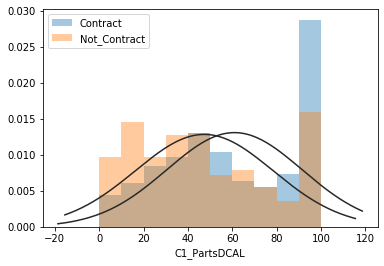

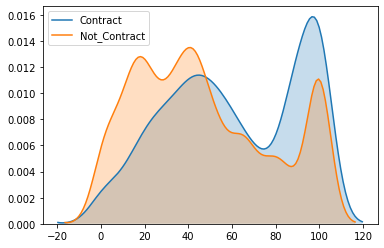

In [74]:
#predefine variables so i only need to edit this box
X = 'C1_PartsDCAL'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]

#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Mean for all equipment is 51%, mean for equipment on contract is 61%, mean for equipment not on contract is 47%.
Standard deviation are similiar across all 3 samples sizes.

Appears that customers have contract on average have 14% higher POPS than customers don't.
Customers have contract has high tendency to have very high POPS since they are completing all the services.

Customers who don't have contract but also have very high pops are potentially our target CVA customers.
Customers who don't have contract and also have very low pops are potentially our largestest opportunity pool.

C1_PartsDCAL should be kept as one of the lead points.

Weight: 10%
Element points: 60~100: 10/10; 50~60:5/10; 45~50: 2/10; 0~45: 0/10
Qualification: CustomerDivision PartsDCAL IS NOT NULL
Points ranking: 0/10
Constraint: Same TCDivisions for selected machines
Note: None
Message: This customer's POPS is %__. Customer is above %threshold (above average contract customer POPS; above average customer POPS; above average non-contract customer POPS; below average customer POPS.)

## C2_ServiceDCAL

(10974, 2)
C2_ServiceDCAL         124
M17_Contract_Active      0
dtype: int64
---------------------------------------
C2_ServiceDCAL         0
M17_Contract_Active    0
dtype: int64
---------------------------------------
C2_ServiceDCAL         float64
M17_Contract_Active      int64
dtype: object
---------------------------------------
C2_ServiceDCAL         float64
M17_Contract_Active       bool
dtype: object
---------------------------------------
       C2_ServiceDCAL  On_Contract  Not_On_Contract   Difference
count    10850.000000  2892.000000      7958.000000 -5066.000000
mean        44.221404    65.990688        36.310274    29.680414
std         36.155975    35.330427        33.076059     2.254368
min          0.000000     0.000000         0.000000     0.000000
25%         13.207500    33.870000         9.270000    24.600000
50%         32.120000    75.685000        26.300000    49.385000
75%         80.830000   100.000000        58.510000    41.490000
max        100.000000   100

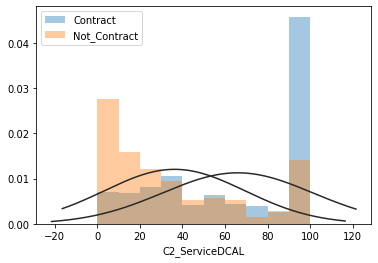

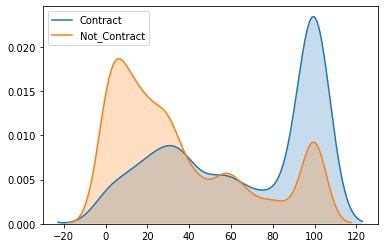

In [75]:
#predefine variables so i only need to edit this box
X = 'C2_ServiceDCAL'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)

#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Mean for all equipment is 44%, mean for equipment on contract is 66%, mean for equipment not on contract is 36%.
Standard deviation are similiar across all 3 samples sizes.

Appears that customers have contract on average have 30% higher POLS than customers don't.
Customers have contract has high tendency to have very high POLS since they are completing the services using toromont labour.

Customers who don't have contract but also have very high POLS are potentially our target CVA customers.
Customers who don't have contract and also have very low POLS are potentially our largestest opportunity pool.
Customers who has contract but also have very low POLS are 1. DIM 2. Missed opportunity.

C2_ServiceDCAL should be kept as one of the lead points.

Weight: 10%
Element points: 65~100: 10/10; 45~65:5/10; 35~45: 2/10; 0~35: 0/10
Qualification: CustomerDivision ServiceDCAL IS NOT NULL
Points ranking: 0/10
Constraint: Same TCDivisions for selected machines
Note: None
Message: This customer's POLS is %__. Customer is above %threshold (above average contract customer POLS; above average customer POLS; above average non-contract customer POLS; below average customer POLS.)

## C3_PSPotential123

(10974, 2)
C3_PSPotential123      60
M17_Contract_Active     0
dtype: int64
---------------------------------------
C3_PSPotential123      0
M17_Contract_Active    0
dtype: int64
---------------------------------------


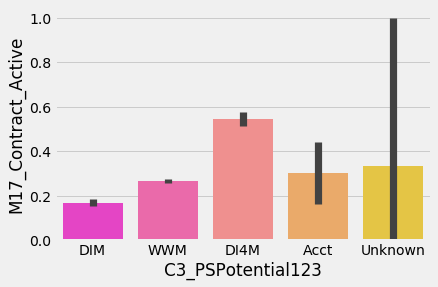

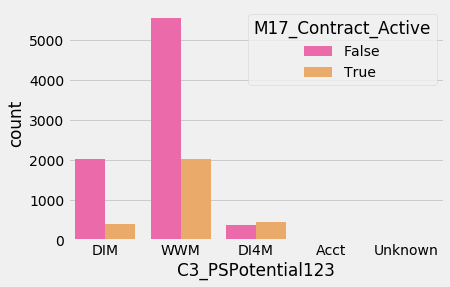

In [164]:
#predefine variables so i only need to edit this box
X = 'C3_PSPotential123'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)

#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
testset[Y] = testset[Y].astype('bool')
print('---------------------------------------')

sns.barplot(x=X, y=Y, data=testset, palette='spring')
plt.show()
sns.countplot(x=X, hue=Y, data=testset, palette = 'spring')
plt.show()

Plot shows that C3_DIM customers have only 17~18% time have M17_Contract_Active, while C4_DI4M customers have around 55% time have contract active.

For the contract active machines, 15% comes from DIM customers, 15% comes from DI4M customers and the rest come from others(WWM) customers.

Recommend assign element points to DI4M/WWM/DIM elements:
DI4M: High points
WWM: Medium points
DIM: Low or negative points

Weight: 5%
Element points: DI4M: 10/10; WWM:5/10; DIM: 2/10; Acct/Unkown: 0/10
Qualification: 
Points ranking: 0/10
Constraint: Same TCDivisions for selected machines
Note: None
Message: This customer's service preference is %_. 

## C5_PSPotentialABC_Low, C6_PSPotentialABC_High

In [ ]:
#predefine variables so i only need to edit this box
x1 = 'C5_PSPotentialABC_Low'
x2 = 'C6_PSPotentialABC_High'
Y = 'M17_Contract_Active'
testset = data.loc[:,[x1,x2,Y]]
testset.head()

In [ ]:
print(testset.isnull().sum())
testset = testset.dropna()
print(testset.isnull().sum())

In [ ]:
ax1 = sns.barplot(y=Y, x=x1, data=testset)
plt.show()
ax3 = sns.barplot(y=Y, x=x2, data=testset)
plt.show()
ax2 = sns.barplot(y=x1, x=Y, data=testset)
plt.show()
ax4 = sns.barplot(y=x2, x=Y, data=testset)
plt.show()

Cummulative percentage plot shows that C5 and C6 are insignificant to whether customer signs contract.

Recommend not to assign points, information only

## C8_Percentage_Parts_Purchased_Direct

In [ ]:
#predefine variables so i only need to edit this box
X = 'C8_Percentage_Parts_Purchased_Direct'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)
testset = testset.drop(testset.index[testset.C8_Percentage_Parts_Purchased_Direct < 0])
testset = testset.drop(testset.index[testset.C8_Percentage_Parts_Purchased_Direct > 100])

In [ ]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])
#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Variance'] = summary['On_Contract'] - summary['Not_On_Contract']
print(summary)
x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()


Mean of % direct for Contract machines are 50%, mean for equipment not on contract is 64%. The higher percentage customer buys from parts department and install themselves, the less likely customer is going to buy contract.

Customers who have PM contract and also have very high % direct are potentially MARC target customers.
Customers who have MARC contract and also have very high % direct possibly are large GET/hose consumers.

Customers who don't have contract and have very high % direct definitely has their own techs.
Customers who don't have contract have very low % direct are missed opportunity for CVA.

C8_Percentage_Parts_Purchased_Direct should be kept as one of the lead points.

## C9_Percentage_Labour_Purchased_PSTotal

In [ ]:
#predefine variables so i only need to edit this box
X = 'C9_Percentage_Labour_Purchased_PSTotal'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)

testset = testset.drop(testset.index[testset.C9_Percentage_Labour_Purchased_PSTotal < 0])
testset = testset.drop(testset.index[testset.C9_Percentage_Labour_Purchased_PSTotal > 100])

In [ ]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])
#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Variance'] = summary['On_Contract'] - summary['Not_On_Contract']
print(summary)
x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Mean of % labour for Contract machines is 30%, mean for equipment not on contract is 20%. The higher percentage customer buys from labour service department, they more they rely on us maintaining the machine.

During tough times, small fleet owners may not be utilizing equipment as much and keeping a team of repair technicians may be financially infeasible. If this is the case for some of the customers, we should consider this percentage as an indicator to customer's reliance.

## C10_Percentage_Parts_Purchased_ServiceTotal

In [ ]:
#predefine variables so i only need to edit this box
X = 'C10_Percentage_Parts_Purchased_ServiceTotal'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)
testset = testset.drop(testset.index[testset.C10_Percentage_Parts_Purchased_ServiceTotal < 0])
testset = testset.drop(testset.index[testset.C10_Percentage_Parts_Purchased_ServiceTotal > 100])

In [ ]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])
#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Variance'] = summary['On_Contract'] - summary['Not_On_Contract']
print(summary)
x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

No significant differences. No points. Do not display

## C15_Percentage_Equipment_Currently_On_Contract

In [ ]:
#predefine variables so i only need to edit this box
X = 'C15_Percentage_Equipment_Currently_On_Contract'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)

testset = testset.drop(testset.index[testset.C15_Percentage_Equipment_Currently_On_Contract < 0])
testset = testset.drop(testset.index[testset.C15_Percentage_Equipment_Currently_On_Contract > 100])

In [ ]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])
#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Variance'] = summary['On_Contract'] - summary['Not_On_Contract']
print(summary)
x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()


One of the determining factors: If customer believes in CVA value, he will buy CVA on all his suitable machines. Else, he might not buy any CVA.

Recommend high element points weight

## Is_Customers_?_Top_Model

In [ ]:
#predefine variables so i only need to edit this box
x1 = 'Is_Customers_1_Top_Model'
x2 = 'Is_Customers_2_Top_Model'
x3 = 'Is_Customers_3_Top_Model'
x4 = 'Is_Customers_4_Top_Model'
x5 = 'Is_Customers_5_Top_Model'
Y = 'M17_Contract_Active'
testset = data.loc[:,[x1,x2,x3,x4,x5,Y]]
testset.head()

In [ ]:
print(testset.isnull().sum())
testset = testset.dropna()
print(testset.isnull().sum())

In [ ]:
ax1 = sns.barplot(y=x1, x=Y, data=testset)
plt.show()
ax2 = sns.barplot(y=x2, x=Y, data=testset)
plt.show()
ax3 = sns.barplot(y=x3, x=Y, data=testset)
plt.show()
ax4 = sns.barplot(y=x4, x=Y, data=testset)
plt.show()
ax5 = sns.barplot(y=x5, x=Y, data=testset)
plt.show()

Hard to say for 2,3,4,5 but from first chart, it is obvious customer has higher likelyhood signing contract for his/her top models (by count).

## M18_Age_In_Years

In [ ]:
#predefine variables so i only need to edit this box
X = 'M18_Age_In_Years'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
testset = testset.drop(testset.index[testset.M18_Age_In_Years > 30])
print(testset.shape)

In [ ]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])
#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Variance'] = summary['On_Contract'] - summary['Not_On_Contract']
print(summary)
x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()


Average age for all 10k machines is 9.48 (exlude machines over 30 years old from population), std 9.48

It is obvious customer much prefer to sign contracts in early ages. 1 standard deviation is cut of at 15 years

## M19_LTDSMU

In [ ]:
#predefine variables so i only need to edit this box
X = 'M19_LTDSMU'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)
testset = testset.drop(testset.index[testset.M19_LTDSMU > 50000])

In [ ]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])
#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Variance'] = summary['On_Contract'] - summary['Not_On_Contract']
print(summary)
x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Average and standard deviation does not seem to matter much in terms of if machine has a contract.

However worth to note if customer has already maintain his machine for a long term, unless business operation changes significantly, he would probably not sign new contract for a machine he knows very well.

Recommend setting maximimum new contract at 16000 hours (No limit for renewal).
No element points.

## M20_AnnualUsage

In [ ]:
#predefine variables so i only need to edit this box
X = 'M20_AnnualUsage'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
testset = testset.drop(testset.index[testset.M20_AnnualUsage > 7200])
print(testset.shape)

In [ ]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])
#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Variance'] = summary['On_Contract'] - summary['Not_On_Contract']
print(summary)
x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Overall they do not vary very much. Mean for contract machines is about 77 hours higher than non-contract machines.

I hope it is result from combination of smart planning, afterhour services and failure prevention. 

If desired maybe compare the equipment fleet by fleet.

No element points. Information only

## M21_Potentially_Disposed

In [ ]:
#predefine variables so i only need to edit this box
x1 = 'M21_Potentially_Disposed'
Y = 'M17_Contract_Active'
testset = data.loc[:,[x1,Y]]
testset.head()

In [ ]:
print(testset.isnull().sum())
testset = testset.dropna()
print(testset.isnull().sum())

In [ ]:
ax1 = sns.barplot(y=Y, x=x1, data=testset)
plt.show()
ax2 = sns.barplot(y=x1, x=Y, data=testset)
plt.show()

Appears my "potentiall_disposed" label is fairly accurate.

No element points

## M22_PLActive

In [ ]:
#predefine variables so i only need to edit this box
x1 = 'M22_PLActive'
Y = 'M17_Contract_Active'
testset = data.loc[:,[x1,Y]]
testset.head()

In [ ]:
print(testset.isnull().sum())
testset = testset.dropna()
print(testset.isnull().sum())

In [ ]:
ax1 = sns.barplot(y=Y, x=x1, data=testset)
plt.show()
ax2 = sns.barplot(y=x1, x=Y, data=testset)
plt.show()

In order for contract to be active, PL needs to be active

About 45% machines have PLActive, but no contract. We can create condition monitoring lite for them.

No element points

## M23_OLGAAmount

In [ ]:
#predefine variables so i only need to edit this box
X = 'M23_OLGAAmount'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
testset = testset.drop(testset.index[testset.M23_OLGAAmount > 500000])
print(testset.shape)

In [ ]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])
#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Variance'] = summary['On_Contract'] - summary['Not_On_Contract']
print(summary)
x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

No significant difference. No element points.

## M25_Months_Until_Warranty_Ends

In [ ]:
#predefine variables so i only need to edit this box
X = 'M25_Months_Until_Warranty_Ends'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)

In [ ]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])
#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Variance'] = summary['On_Contract'] - summary['Not_On_Contract']
print(summary)
x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

With contract machines generally being newer, the average warranty expire is 6 months higher than non-contract.

## M30_Number_Of_Contracts_Under_Base_Model

Information only. No element points.

Reps would generally feel more confident selling contract on machines we know very well.

## M32_Percentage_Parts_Purchased_Direct

In [ ]:
#predefine variables so i only need to edit this box
X = 'M32_Percentage_Parts_Purchased_Direct'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
testset = testset.drop(testset.index[testset.M32_Percentage_Parts_Purchased_Direct > 100])
testset = testset.drop(testset.index[testset.M32_Percentage_Parts_Purchased_Direct < 0])
print(testset.shape)

In [ ]:
print(testset.shape)
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])
#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Variance'] = summary['On_Contract'] - summary['Not_On_Contract']
print(summary)
x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()


Mean of % direct for Contract machines are 23.65%, mean for equipment not on contract is 42.75%. The higher percentage customer buys from parts department and install themselves, the less likely customer is going to buy contract.

Equipment currently has PM contract and also has very high % direct are potentially MARC target machine.
Equipment currently has MARC contract and also has very high % direct possibly are large GET/hose machine.

Equipment that doesn't have contract and have very high % direct definitely has their own techs.
Equipment that doesn't contract have very low % direct are missed opportunity for CVA.

M32_Percentage_Parts_Purchased_Direct should be kept as one of the lead points.

## M33_Percentage_Labour_Purchased_PSTotal

In [ ]:
#predefine variables so i only need to edit this box
X = 'M33_Percentage_Labour_Purchased_PSTotal'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
testset = testset.drop(testset.index[testset.M33_Percentage_Labour_Purchased_PSTotal < 0])
testset = testset.drop(testset.index[testset.M33_Percentage_Labour_Purchased_PSTotal > 100])
print(testset.shape)

In [ ]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])
#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Variance'] = summary['On_Contract'] - summary['Not_On_Contract']
print(summary)
x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()


Based on averages, we sell twice as much labour on contracts vs non-contracts. 

Customers who currently buys high percentage labour are candidates for contracts.

## M34_Percentage_Parts_Purchased_ServiceTotal

In [ ]:
#predefine variables so i only need to edit this box
X = 'M34_Percentage_Parts_Purchased_ServiceTotal'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
testset = testset.drop(testset.index[testset.M34_Percentage_Parts_Purchased_ServiceTotal < 0])
testset = testset.drop(testset.index[testset.M34_Percentage_Parts_Purchased_ServiceTotal > 100])
print(testset.shape)

In [ ]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])
#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Variance'] = summary['On_Contract'] - summary['Not_On_Contract']
print(summary)
x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()


Parts percentage from service is much higher on contract machines than non-contract machines.

It first surprised me but also makes sense. Customers who don't buy contracts may only use toromont for major or high technical repairs, VS 50%/50% split on lighter works(PM and preventative repairs).

## M35_Percentage_Parts_Returned

In [ ]:
#predefine variables so i only need to edit this box
X = 'M35_Percentage_Parts_Returned'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
testset = testset.drop(testset.index[testset.M35_Percentage_Parts_Returned > 100])

print(testset.shape)

In [ ]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])
#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Variance'] = summary['On_Contract'] - summary['Not_On_Contract']
print(summary)
x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Non contract machine normally has slightly higher return percentage than contract machines. (customer ordering wrong parts).

Information only

## M36_Percentage_WO_Backed_Out

In [ ]:
#predefine variables so i only need to edit this box
X = 'M36_Percentage_WO_Backed_Out'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)

In [ ]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])
#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Variance'] = summary['On_Contract'] - summary['Not_On_Contract']
print(summary)
x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()


Machines under contract has 70% more back outs than non contract machines.

This may be resultant of condition monitoring analyst / contract execution verifying billings.

Information only. No element points

## M37_SOS_Count

In [ ]:
#predefine variables so i only need to edit this box
X = 'M37_SOS_Count'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)

In [ ]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])
#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Variance'] = summary['On_Contract'] - summary['Not_On_Contract']
print(summary)
x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Mean for equipment with contract is 33 SOS over 5 years, mean for equipment without SOS is 8 over 5 years.

SOS is a method of detecting issues and generate repairs. Higher SOS count increases likelihood generating parts and service sales.

No element points, information only.